Data from http://www.pressureplot.com/data.aspx
    
See the specific liscence for terms

this notebook is a work in progress

In [110]:
import pandas as pd
from pathlib import Path
from tqdm.auto import tqdm
import PIL
from IPython.display import display
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/wassname/.pyenv/versions/jup3.7.3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['table', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [354]:
datadir_in = Path('../../data/raw/PHGDatabase/PHGDatabase_April2019.mdb')
datadir_out = Path('../../data/processed/PHGDatabase/PHGDatabase_April2019')
datadir_in.exists()
datadir_out.mkdir(exist_ok=True, parents=True)

# export from mdb

In [113]:
cmd = f"mdb-tables {datadir_in}"
tables = getoutput(cmd).split()
tables

for table in tables:
    cmd = f"mdb-export {datadir_in} {table}" % ()
    csv = getoutput(cmd)
    fo=f"{datadir_out}/{table}.csv"
    print(fo)
    open(fo, 'w').write(csv)

mdb-tables ../../data/raw/PHGDatabase/PHGDatabase_April2019.mdb
mdb-export ../../data/raw/PHGDatabase/PHGDatabase_April2019.mdb PHG_Well
../../data/interim/PHGDatabase/PHGDatabase_April2019/PHG_Well.csv
mdb-export ../../data/raw/PHGDatabase/PHGDatabase_April2019.mdb PHG_Chem_Data
../../data/interim/PHGDatabase/PHGDatabase_April2019/PHG_Chem_Data.csv
mdb-export ../../data/raw/PHGDatabase/PHGDatabase_April2019.mdb PHG_Lithology
../../data/interim/PHGDatabase/PHGDatabase_April2019/PHG_Lithology.csv
mdb-export ../../data/raw/PHGDatabase/PHGDatabase_April2019.mdb PHG_Log_Salinity
../../data/interim/PHGDatabase/PHGDatabase_April2019/PHG_Log_Salinity.csv
mdb-export ../../data/raw/PHGDatabase/PHGDatabase_April2019.mdb PHG_FIT_View
../../data/interim/PHGDatabase/PHGDatabase_April2019/PHG_FIT_View.csv
mdb-export ../../data/raw/PHGDatabase/PHGDatabase_April2019.mdb PHG_Mudweight_View


KeyboardInterrupt: 

In [ ]:
# 

# import from csv

In [295]:
tables = {}
fs = sorted(datadir_out.glob('*.csv'))
for f in tqdm(fs):
    df = pd.read_csv(f)
    df.name = f.stem
    tables[f.stem]=df

In [296]:
# list tables
pd.Series({k:len(v) for k,v in tables.items()}).sort_values()

PHG_FluidCtype                     3
PHG_CoreType                       3
PHG_Gauges                         5
PHG_Depletion                      7
PHG_WellType                       8
PHG_WellStatus                    13
PHG_Hydrocarbon_Type              18
PHG_BioMethod                     20
PHG_PorMethod                     23
PHG_TestType                      25
PHG_Fluid_Recovery_Units          32
PHG_FluidType                     34
PHG_Reservoir                     51
PHG_DataSource                    56
PHG_Basin                         56
PHG_Kick_View                     73
PHG_AnalMethod                    75
PHG_ChemLab                       78
PHG_Fault                         88
PHG_Formation_Type                98
PHG_LithType                     113
PHG_Thermal_View                 231
PHG_Operator                     318
PHG_Fluid_Contact_View           574
PHG_Member                       734
PHG_Formation_Interval_Test      971
PHG_FITPgauge                   1318
P

In [358]:
df_dst = tables['PHG_Dst_Horner'].copy()
df_dst['WELL_NAME'] = df_dst['WELL_ID'].replace(replace_id2name)
df_dst = df_dst.dropna()
df_dst

,WELL_ID,TEST_NUMBER,GAUGE_DEPTH,CYCLE_NUMBER,DELTA_T,PRESSURE,TEMPERATURE,FLOWING_TIME,HORNER_TIME,WELL_NAME
78,43.0,4.0,3037.18,1,0.01,918.70,88.42,2.0,201.00000,DAMPIER 1
79,43.0,4.0,3037.18,1,4.00,1484.70,88.37,2.0,1.50000,DAMPIER 1
80,43.0,4.0,3037.18,1,8.00,1871.70,88.34,2.0,1.25000,DAMPIER 1
81,43.0,4.0,3037.18,1,12.00,2183.70,88.31,2.0,1.16667,DAMPIER 1
82,43.0,4.0,3037.18,1,16.00,2528.70,88.28,2.0,1.12500,DAMPIER 1
...,...,...,...,...,...,...,...,...,...,...
61249,5994.0,1.0,653.80,4,60.00,974.17,60.50,95.0,2.58333,NASUTUS 1
61250,5994.0,1.0,653.80,4,75.00,974.70,60.40,95.0,2.26667,NASUTUS 1
61251,5994.0,1.0,653.80,4,90.00,974.82,603.00,95.0,2.05556,NASUTUS 1
61252,5994.0,1.0,653.80,4,105.00,974.81,60.30,95.0,1.90476,NASUTUS 1


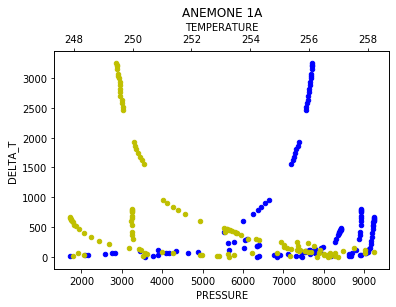

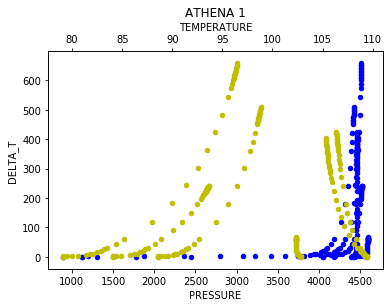

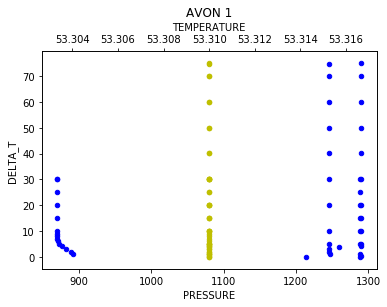

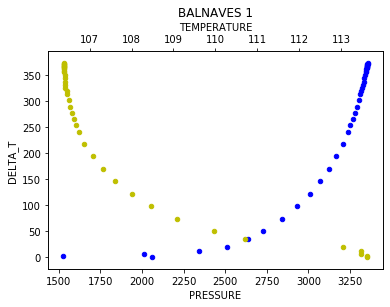

In [359]:
# need gradient for each test
for i, (n,g) in enumerate(df_dst.groupby('WELL_NAME')):
    ax=plt.gca()
    ax2=plt.twiny()
    g.plot.scatter(x='PRESSURE', y='DELTA_T', ax=ax, c='blue')
    g.plot.scatter(x='TEMPERATURE', y='DELTA_T', ax=ax2, c='y')
    plt.title(f"{n}")
    plt.show()
    if i>2:
        break

In [367]:
# import matplotlib.cm as cm

# x = np.arange(15)
# ys = [i+x+(i*x)**2 for i in range(15)]

# colors = cm.rainbow(np.linspace(0, 1, len(ys)))

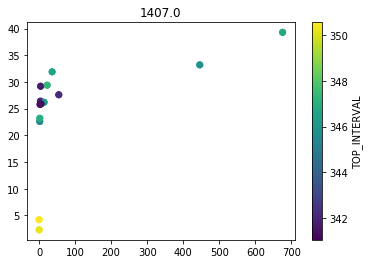

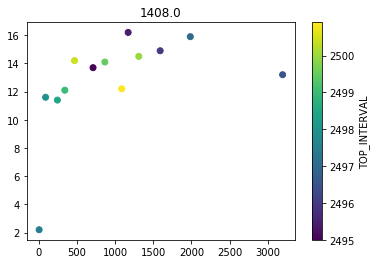

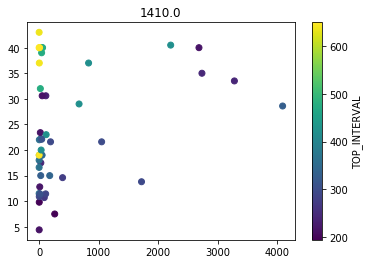

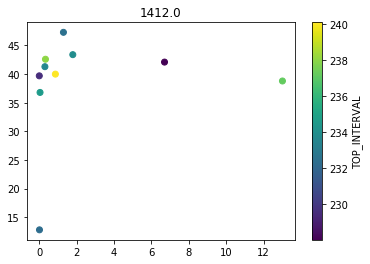

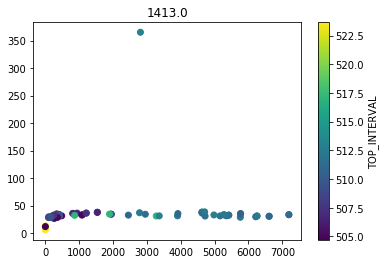

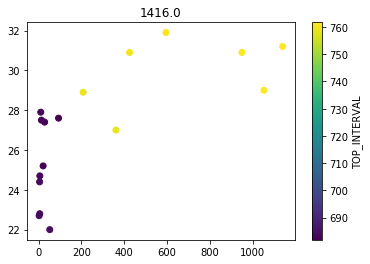

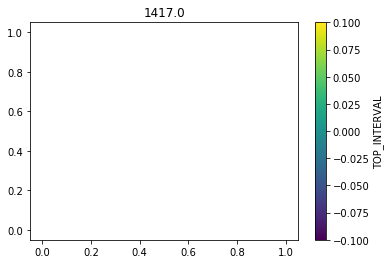

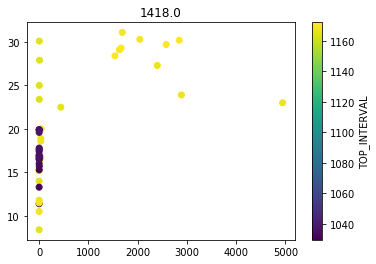

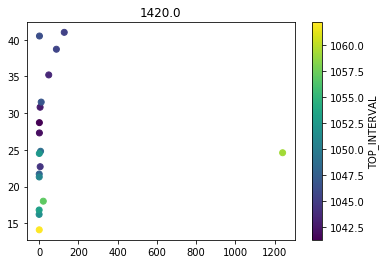

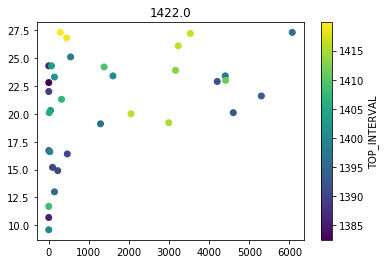

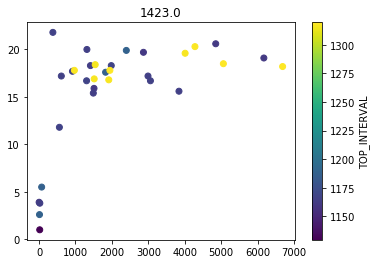

In [389]:


replace_id2name=tables['PHG_Well'].set_index('WELL_ID')['WELL_NAME']
replace_lith = tables['PHG_LithType'].set_index('LITHOLOGY_TYPE_CODE')['LITHOLOGY_TYPE_DESCRIPTION']

# get poro perm
df = tables['PHG_Porperm_View'].copy()
df['WELL_NAME'] = df['WELL_ID'].replace(replace_id2name).values
df['Lithology'] = df['LITHOLOGY_CODE'].replace(replace_lith).values


df_poroperm = df[['WELL_NAME', 'TOP_INTERVAL', 'PERMEABILITY', 'POROSITY', 'Lithology', 'GRAIN_DENSITY']].set_index(['WELL_NAME', 'TOP_INTERVAL'])
df_poroperm


for i,(n,g) in enumerate(df_poroperm.groupby('WELL_NAME')):
    if i>15:
        break
    if len(g)>10:
        im=plt.scatter(x=g['PERMEABILITY'], y=g['POROSITY'], c=g.xs(n).index)
        plt.title(f'well name: {n}')
        plt.colorbar(label='TOP_INTERVAL')
        plt.show()